## Telecom Churn Case Study

### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

##### Predict which customers are at high risk of churn.

Case Study submission done by sriram.bsk@gmail.com and santoshkumarpuvvada@gmail.com

### 1. Data Importing

In [1]:
# Import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
import xgboost as xgb
from sklearn import metrics
from sklearn import model_selection

In [2]:
# Importing the data
data=pd.read_csv('telecom_churn_data.csv')

In [3]:
# Checking top 5 rows
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# Checking row and column size
data.shape

(99999, 226)

In [5]:
# Setting max display for rows and columns
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [6]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### 2. Data Cleaning

In [7]:
# Identifying Missing Data %
round(data.isnull().sum()/data.shape[0]*100,2).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [8]:
# We can impute some of the recharge_data columns, average_recharge_data columns missing values to zero.
# We should not drop them right away because they are required for High Value Customer Identification
col_to_impute=['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
               'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
for i in col_to_impute:
    data[i]=data[i].fillna(0)

In [9]:
# Identifying Missing Data %
round(data.isnull().sum()/data.shape[0]*100,2).sort_values(ascending=False)

count_rech_3g_6             74.85
fb_user_6                   74.85
date_of_last_rech_data_6    74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
max_rech_data_6             74.85
count_rech_2g_6             74.85
arpu_3g_6                   74.85
fb_user_7                   74.43
arpu_3g_7                   74.43
date_of_last_rech_data_7    74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
night_pck_user_7            74.43
max_rech_data_7             74.43
arpu_3g_9                   74.08
fb_user_9                   74.08
max_rech_data_9             74.08
date_of_last_rech_data_9    74.08
count_rech_3g_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
count_rech_2g_8             73.66
arpu_3g_8                   73.66
max_rech_data_8             73.66
arpu_2g_8                   73.66
count_rech_3g_8             73.66
night_pck_user

In [10]:
# If the missing value is more than 50% we are going to drop those columns/features
col_to_drop=list(data.columns[round(data.isnull().sum()/data.shape[0]*100,2)>50])

In [11]:
# Dropping the columns which have missing values more than 50%
data=data.drop(col_to_drop,1)

In [12]:
# Checking shape after dropping the missing columns
data.shape

(99999, 194)

In [13]:
# Checking the missing values 
round(data.isnull().sum()/data.shape[0]*100,2).sort_values(ascending=False)

loc_ic_t2f_mou_9        7.75
spl_ic_mou_9            7.75
std_ic_t2f_mou_9        7.75
std_ic_mou_9            7.75
roam_og_mou_9           7.75
std_ic_t2m_mou_9        7.75
loc_og_t2m_mou_9        7.75
std_ic_t2t_mou_9        7.75
roam_ic_mou_9           7.75
loc_og_t2c_mou_9        7.75
loc_ic_mou_9            7.75
offnet_mou_9            7.75
std_og_t2m_mou_9        7.75
std_og_t2t_mou_9        7.75
loc_ic_t2m_mou_9        7.75
std_ic_t2o_mou_9        7.75
onnet_mou_9             7.75
loc_ic_t2t_mou_9        7.75
spl_og_mou_9            7.75
loc_og_mou_9            7.75
std_og_t2c_mou_9        7.75
std_og_mou_9            7.75
loc_og_t2f_mou_9        7.75
isd_og_mou_9            7.75
ic_others_9             7.75
og_others_9             7.75
std_og_t2f_mou_9        7.75
isd_ic_mou_9            7.75
loc_og_t2t_mou_9        7.75
isd_ic_mou_8            5.38
ic_others_8             5.38
std_og_t2m_mou_8        5.38
std_og_t2t_mou_8        5.38
std_ic_mou_8            5.38
std_ic_t2t_mou

In [14]:
# Checking Unique Values
col_to_drop=list(data.columns[data.nunique()==1])

In [15]:
# Dropping columns which have just 1 unique value
data=data.drop(col_to_drop,1)

In [16]:
# Checking shape after dropping above columns
data.shape

(99999, 178)

In [17]:
# Viewing top 5 rows
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,

In [18]:
# Checking if all data is in numeric
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 178 entries, mobile_number to sep_vbc_3g
dtypes: float64(140), int64(34), object(4)
memory usage: 135.8+ MB
None


In [19]:
# Converting date MM/DD/YYYY into date DD
data["date_of_last_rech_6"] = data["date_of_last_rech_6"].str.split('/').str[1]
data["date_of_last_rech_7"] = data["date_of_last_rech_7"].str.split('/').str[1]
data["date_of_last_rech_8"] = data["date_of_last_rech_8"].str.split('/').str[1]
data["date_of_last_rech_9"] = data["date_of_last_rech_9"].str.split('/').str[1]

In [20]:
# Checking if the conversion is successful
data["date_of_last_rech_6"].head()

0    21
1    29
2    17
3    28
4    26
Name: date_of_last_rech_6, dtype: object

In [21]:
# Converting object to date format
data["date_of_last_rech_6"] = pd.to_numeric(data["date_of_last_rech_6"],downcast="integer")
data["date_of_last_rech_7"] = pd.to_numeric(data["date_of_last_rech_7"],downcast="integer")
data["date_of_last_rech_8"] = pd.to_numeric(data["date_of_last_rech_8"],downcast="integer")
data["date_of_last_rech_9"] = pd.to_numeric(data["date_of_last_rech_9"],downcast="integer")

In [22]:
# Checking if all data is in numeric
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 178 entries, mobile_number to sep_vbc_3g
dtypes: float64(144), int64(34)
memory usage: 135.8 MB
None


In [23]:
# Impute missing value with zero when we are sure the missing value is a zero

In [24]:
# Identifying columns which are having missing values
col_to_impute=list(data.columns[round(data.isnull().sum()/data.shape[0]*100,2)!=0])

In [25]:
# These are the columns
col_to_impute

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


In [26]:
# Imptuing zero for the missing values since it makes no sense to impute with Mean since the missing value signify no transaction done for that particular month for that mobile number
for i in col_to_impute:
  data[i]=data[i].fillna(0)

In [27]:
# Checking if there are any more missing columns
data.columns[round(data.isnull().sum()/data.shape[0]*100,2)!=0]

Index([], dtype='object')

#### Filter High Value Customers

In [28]:
# Creating new derived columns for data recharge amounts
data['total_rech_amt_data_6']=data['av_rech_amt_data_6']*data['total_rech_data_6']
data['total_rech_amt_data_7']=data['av_rech_amt_data_7']*data['total_rech_data_7']
data['total_rech_amt_data_8']=data['av_rech_amt_data_8']*data['total_rech_data_8']

In [29]:
# Creating a new column for average_recharge_amount for Month 6&7
data['avg_recharge_amount_6_7']=(data['total_rech_amt_6']+data['total_rech_amt_data_6']+data['total_rech_amt_7']+data['total_rech_amt_data_7'])/2

In [30]:
# Checking if the column created corrected
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,avg_recharge_amount_6_7
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,21.0,16.0,8.0,28.0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,252.0,252.0,252.0,559.0
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.

In [31]:
# Taking the 70% percentile value
cutoff = data['avg_recharge_amount_6_7'].quantile(q=0.7)
cutoff

478.0

In [32]:
# Creating a new column to identify the high value customers
data['HVC']=data['avg_recharge_amount_6_7'].map(lambda x: 1 if x > cutoff else 0)

In [33]:
# Checking the map function result
data['HVC'].value_counts()

0    70046
1    29953
Name: HVC, dtype: int64

In [34]:
# Creating a new dataframe for HVC
data_hvc=data[data['HVC']==1]

In [35]:
# Checking HVC Data frame shape
data_hvc.shape

(29953, 183)

In [36]:
# Percentage of high value customers
data_hvc.shape[0]/data.shape[0]*100

29.95329953299533

#### Define Churn Phase

In [37]:
# Creating Usage Churn Indicator i.e. sum of 4 usage indicators
data_hvc['usage_churn_indicator']=data_hvc['total_ic_mou_9']+data_hvc['total_og_mou_9']+data_hvc['vol_2g_mb_9']+data_hvc['vol_3g_mb_9']

In [38]:
# Checking if the usage indicator was created correctly
data_hvc['usage_churn_indicator'].value_counts(normalize=True).head()

0.00       0.081227
0.03       0.000167
0.21       0.000167
601.34     0.000134
1270.12    0.000100
Name: usage_churn_indicator, dtype: float64

In [39]:
# Creating a churn indicator
data_hvc['Churn']=data_hvc['usage_churn_indicator'].map(lambda x: 1 if x == 0 else 0)

In [40]:
# Checking map function result
data_hvc['Churn'].value_counts()

0    27520
1     2433
Name: Churn, dtype: int64

In [41]:
# Dropping all _9 variables
col_to_drop=data_hvc.columns[data_hvc.columns.str.endswith('_9')]
data_hvc=data_hvc.drop(col_to_drop,1)

In [42]:
# Dropping intermediate columns created
col_to_drop = ['HVC','usage_churn_indicator','avg_recharge_amount_6_7']
data_hvc=data_hvc.drop(col_to_drop,1)

In [43]:
# Checking the shape
data_hvc.shape

(29953, 139)

In [44]:
list(data_hvc.columns)

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

In [45]:
# Checking if any column have number of unique value == number of rows
(data_hvc.nunique()/data_hvc.shape[0]).sort_values(ascending=False)

mobile_number            1.000000
arpu_7                   0.969519
arpu_6                   0.969152
arpu_8                   0.935966
total_og_mou_7           0.789670
total_og_mou_6           0.784295
total_og_mou_8           0.744066
offnet_mou_7             0.708877
offnet_mou_6             0.707709
total_ic_mou_7           0.672487
offnet_mou_8             0.672387
total_ic_mou_6           0.671018
total_ic_mou_8           0.653190
loc_ic_mou_6             0.617768
loc_og_mou_7             0.617401
loc_ic_mou_7             0.617067
loc_og_mou_6             0.612092
loc_ic_mou_8             0.602544
loc_og_mou_8             0.586419
onnet_mou_7              0.566654
onnet_mou_6              0.563282
std_og_mou_7             0.532100
std_og_mou_6             0.530798
onnet_mou_8              0.529296
loc_og_t2m_mou_7         0.522786
loc_og_t2m_mou_6         0.521050
loc_ic_t2m_mou_7         0.518713
loc_ic_t2m_mou_6         0.515808
loc_og_t2m_mou_8         0.504724
loc_ic_t2m_mou

In [46]:
# From above we can see MobileNumber is always unique, so it will be dropped
data_hvc=data_hvc.drop('mobile_number',1)

In [47]:
# Checking the shape
data_hvc.shape

(29953, 138)

In [48]:
# Percentage of Churn customers are
(data_hvc['Churn']==1).sum()/data_hvc.shape[0]*100

8.122725603445398

### 3. Data Preparation

In [49]:
# EDA
# create box plot for 6th, 7th and 8th month
def plot_boxchart(attribute):
    plt.figure(figsize=(16,10*len(attribute)/3))
    df = data_hvc
    j=1
    for i in attribute:      
      plt.subplot(len(attribute)/3,3,j)
      #plt.title(i,' vs Churn')
      sns.boxplot(data=df, y=i,x="Churn",hue="Churn",showfliers=False,palette=("plasma"))
      plt.legend(loc='best')
      j=j+1
    plt.show()

In [50]:
# Plotting Box Plot Chart for Recharge Amounts
col_about_recharge =  data_hvc.columns[data_hvc.columns.str.contains('rech_amt')]
list(col_about_recharge)

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8']

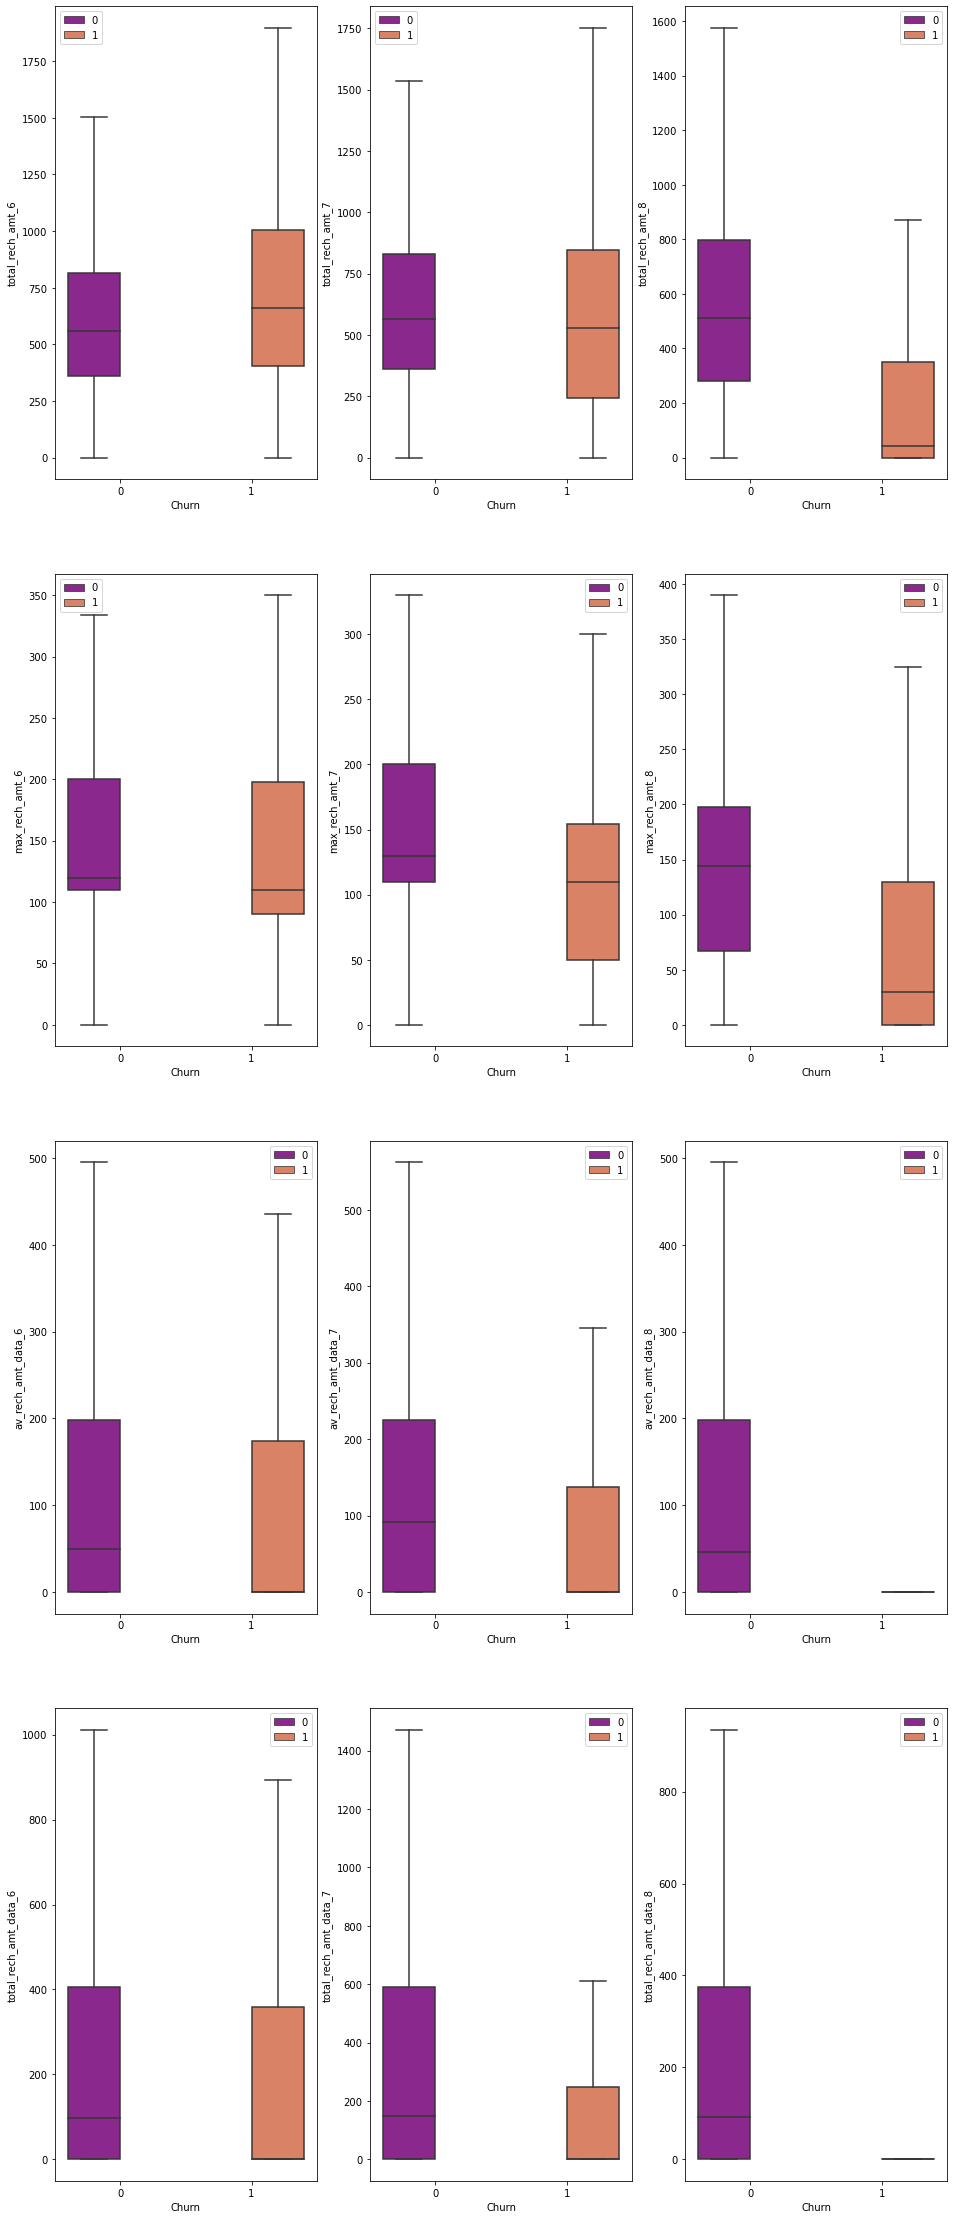

In [51]:
plot_boxchart(col_about_recharge)

We can see that customers who are planning to churn in 9th month are not recharging in 8th month (Action month)

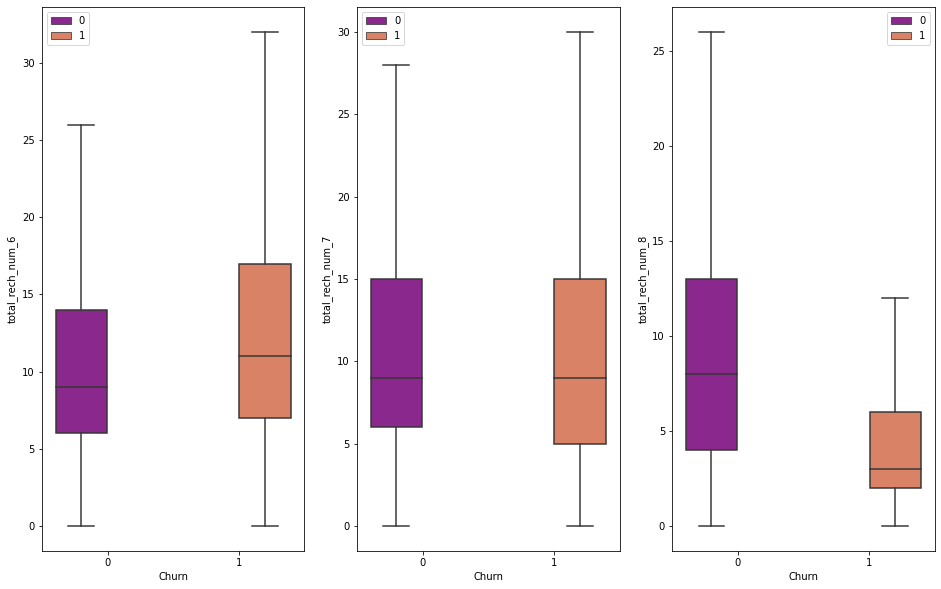

In [52]:
# Plotting box plot chart for Total Recharge number
total_rech_num=['total_rech_num_6','total_rech_num_7','total_rech_num_8']
plot_boxchart(total_rech_num)

We can see Customers who are planning to churn are having slight decrease in total recharge numbers in 7th and more decrease in 8th month

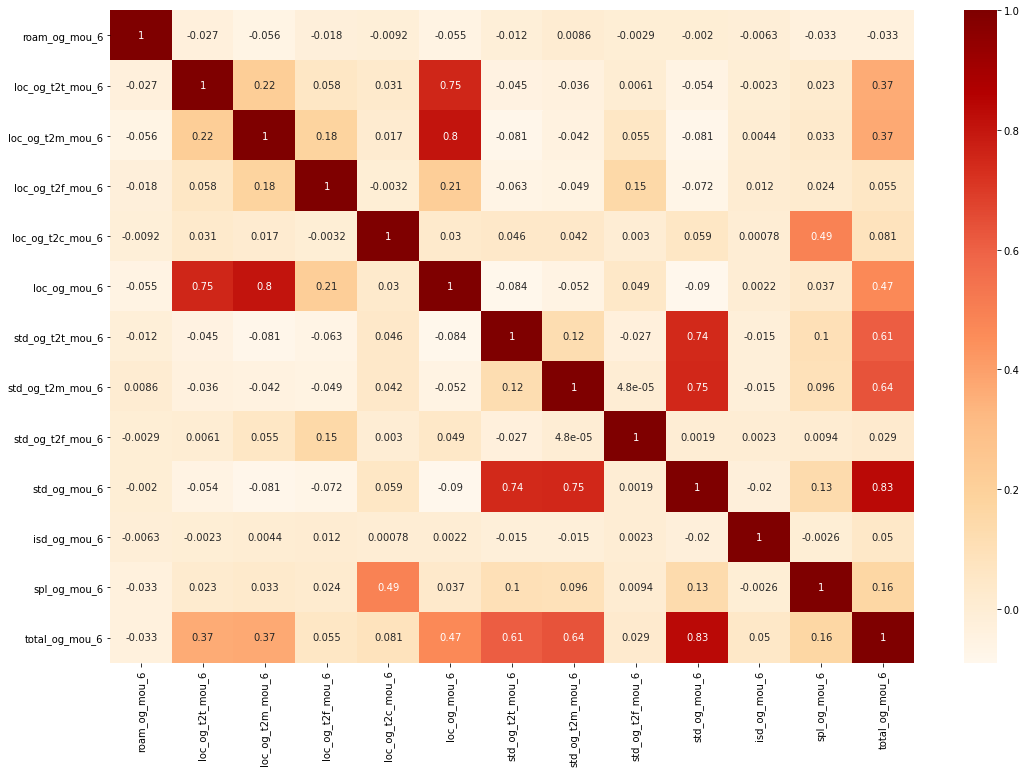

In [53]:
# Heat Map for Usage columns_6th Month Outgoing calls
usage_columns=data_hvc.columns[data_hvc.columns.str.contains('.*_og_.*mou_6')]
plt.figure(figsize=(18,12))
sns.heatmap(data_hvc[usage_columns].corr(),cmap="OrRd",annot=True)
plt.show()

We find some of the above features are having high correlation. We will not drop them because when we do RFE highly correlated features will be dropped automatically

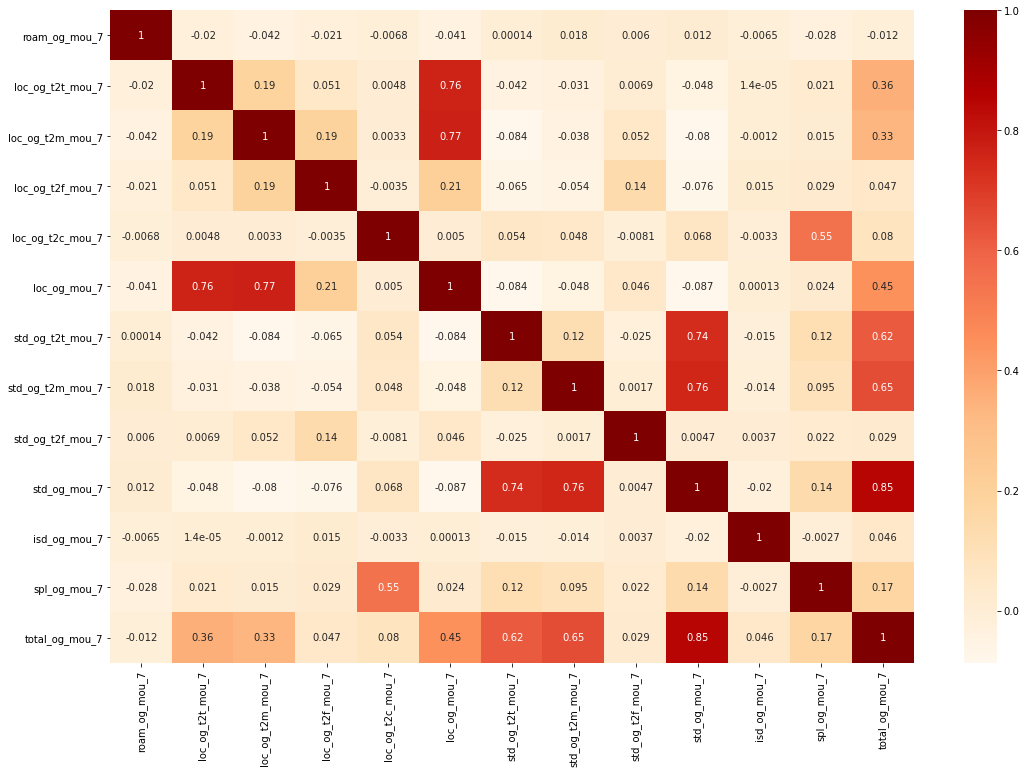

In [54]:
# Heat Map for Usage columns_7th Month Outgoing calls
usage_columns=data_hvc.columns[data_hvc.columns.str.contains('.*_og_.*mou_7')]
plt.figure(figsize=(18,12))
sns.heatmap(data_hvc[usage_columns].corr(),cmap="OrRd",annot=True)
plt.show()

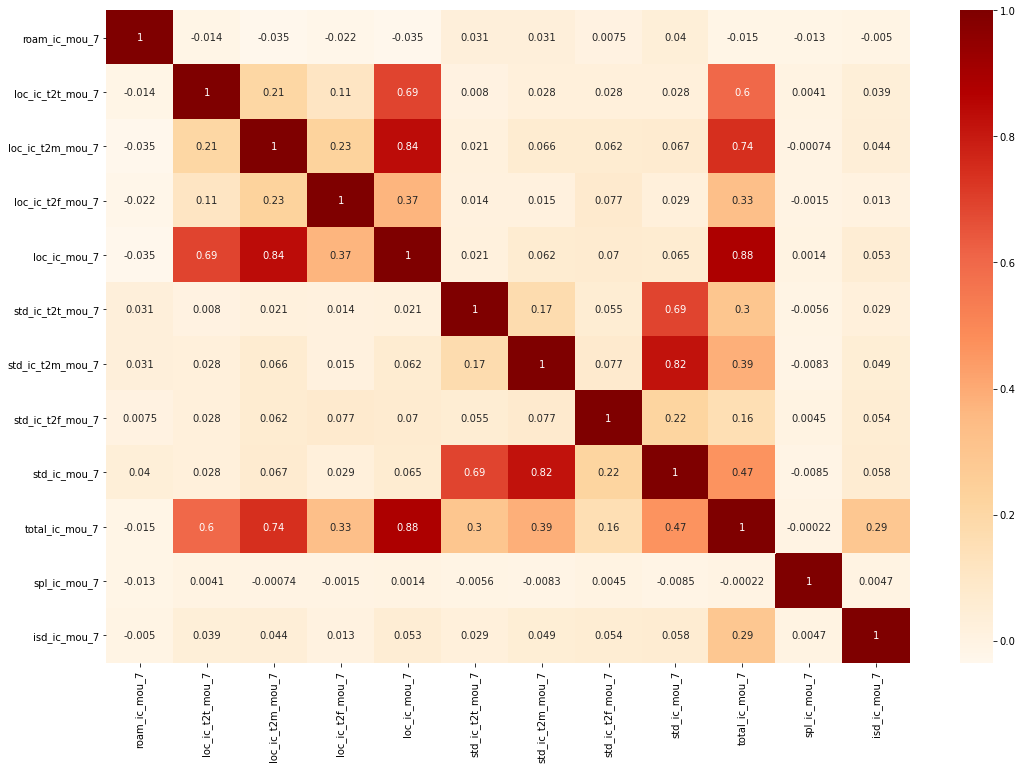

In [55]:
# Heat Map for Usage columns_6th Month Incoming calls
usage_columns=data_hvc.columns[data_hvc.columns.str.contains('.*_ic_.*mou_7')]
plt.figure(figsize=(18,12))
sns.heatmap(data_hvc[usage_columns].corr(),cmap="OrRd",annot=True)
plt.show()

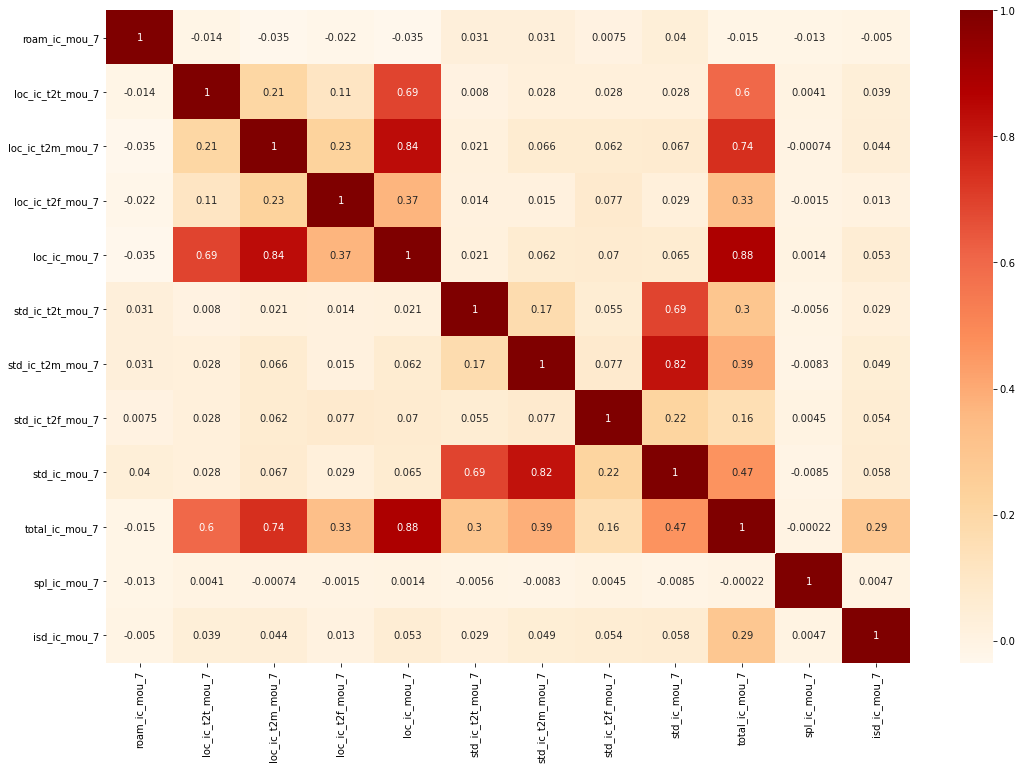

In [56]:
# Heat Map for Usage columns_7th Month Incoming calls
usage_columns=data_hvc.columns[data_hvc.columns.str.contains('.*_ic_.*mou_7')]
plt.figure(figsize=(18,12))
sns.heatmap(data_hvc[usage_columns].corr(),cmap="OrRd",annot=True)
plt.show()

In [57]:
# Outlier Treatment
data_hvc.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Churn
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,558.820058,561.160547,508.890301,260.900880,268.051744,234.345252,373.800402,378.233106,335.123008,16.124001,12.646145,12.512269,26.596033,20.155134,19.889295,8

From above we can see many of the features might have outliers

In [58]:
data_hvc.quantile(q=[0,0.0013,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.9987,1])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Churn
0.0000,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.000,0.000000,0.0000,0.000000,0.000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0000,0.0
0.0013,0.000000,-5.000000,-5.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.000,0.000000,0.00

In [59]:
data_hvc.arpu_7.quantile(q=0.0013)

-5.0

In [60]:
data_hvc.arpu_7.quantile(q=0.9987)

3602.2081392001637

In [61]:
# Need to remove outliers for below columns and keep only Mean  +/- 3 Sigma
col_outlier=data_hvc.columns#['arpu_6','arpu_7','arpu_8']
for i in col_outlier:
    data_hvc=data_hvc[data_hvc[i]>=data_hvc[i].quantile(q=0.0013)]
    data_hvc=data_hvc[data_hvc[i]<=data_hvc[i].quantile(q=0.9987)]

In [62]:
data_hvc.quantile(q=[0,0.0013,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.9987,1])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Churn
0.0000,0.000000,-3.600000,-5.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0,0.0
0.0013,0.000000,0.000000,-3.112080,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000

#### Feature Scaling

In [63]:
# Putting feature variable to X 
# Removed Churn because it is a dependent Variable / Target Variable
X = data_hvc.drop(['Churn'], axis=1)
X.head()
columns_1=X.columns
index_1=X.index

In [64]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X=pd.DataFrame(X,columns=columns_1,index=index_1)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
0,-1.034865,-0.983224,-0.738836,-0.640608,-0.634361,-0.594620,-0.869497,-0.873299,-0.822278,-0.242813,-0.209873,-0.218608,-0.260146,-0.239826,-0.241062,-0.494224,-0.501567,-0.499336,-0.735629,-0.760023,-0.727688,-0.375814,-0.386378,-0.383703,-0.30178,-0.308907,-0.310923,-0.794143,-0.815612,-0.779212,-0.452199,-0.454910,-0.417096,-0.483179,-0.486606,-0.450832,-0.190899,-0.198363,-0.196427,-0.630459,-0.635579,-0.576758,-0.101732,-0.108982,-0.094259,-0.443324,-0.485523,-0.469951,-0.351871,-0.041595,-0.041535,-1.005850,-1.013425,-0.924638,-0.574439,-0.586614,-0.574611,-0.828245,-0.849447,-0.791378,-0.411026,-0.422161,-0.383134,-0.906055,-0.927229,-0.864211,-0.332351,-0.340840,-0.325706,-0.439813,-0.454425,-0.445796,-0.239015,-0.252593,-0.255271,-0.515570,-0.533611,-0.513195,-0.996652,-1.023486,-0.948361,-0.422016,-0.212568,-0.253763,-0.203895,-0.226579,-0.216667,-0.201877,-0.216221,-0.210494,-0.905795,-1.008113,-0.930700,-0.653812,-0.944555,-0.685473,0.742999,0.732552,0.834744,-1.117329,-2.332567,-2.837871,1.510224,1.468550,1.546211,-0.242298,-0.284430,-0.202699,0.844503,0.777855,0.932973,-0.320039,-0.417552,-0.363673,-0.338873,-0.249794,-0.292484,-0.409628,-0.415548,-0.388586,-0.456005,-0.477350,-0.446117,1.602678,1.541289,1.629477,-0.267223,-0.266225,-0.233523,-0.261145,-0.350296,-0.444548,-0.106151,-0.072167,-0.158790,-0.206105,-0.123600
8,-0.422207,-0.015767,-0.984967,0.508739,0.325154,-0.489331,-0.623420,-0.660202,-0.433275,-0.242813,-0.209873,-0.218608,-0.260146,-0.239826,-0.241062,1.586051,1.061753,-0.401096,-0.340775,-0.402635,-0.462908,-0.375814,-0.386378,-0.383703,-0.30178,-0.308907,1.298853,0.529932,0.227847,-0.542247,-0.104412,-0.066395,-0.344114,-0.441793,-0.456177,-0.190941,-0.190899,-0.198363,-0.196427,-0.367749,-0.348702,-0.359830,-0.101732,-0.108982,-0.094259,-0.443324,-0.485523,0.451175,-0.351871,-0.041595,-0.041535,-0.068386,-0.217371,-0.590135,-0.328988,-0.482407,-0.572942,-0.480304,-0.762614,-0.721239,-0.411026,-0.422161

In [65]:
# Putting response / dependent / target variable to y
y = data_hvc['Churn']
y.head()

0     1
8     0
21    0
23    0
38    0
Name: Churn, dtype: int64

#### Train / Test Split

In [66]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [67]:
# Percentage of Churn Customer in main data set
len(data_hvc[data_hvc['Churn']==1])/len(data_hvc)*100

7.955446329475187

In [68]:
# Percentage of Churn Customer in Train data set
len(y_train[y_train==1])/len(y_train)*100

8.14881929894105

In [69]:
# Percentage of Churn Customer in Train data set
len(y_test[y_test==1])/len(y_test)*100

7.504293830096446

So we can see almost same percentage (around 8%) of churn customers in both train and test set

In [70]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
11439,1.405891,-0.020419,0.419566,0.446644,0.531609,0.797609,0.000143,-0.009492,0.135807,-0.242813,-0.209873,-0.218608,-0.260146,-0.239826,-0.241062,2.228274,2.515937,3.140648,-0.069948,-0.141962,0.368889,-0.045540,-0.337171,-0.206873,-0.30178,-0.247478,-0.310923,1.062132,1.149573,1.755685,-0.444799,-0.435809,-0.413606,0.078399,0.126154,-0.035775,0.277871,0.094484,0.560916,-0.244763,-0.214981,-0.299440,-0.101732,-0.108982,-0.094259,-0.027552,-0.460469,-0.469951,-0.351871,-0.041595,-0.041535,0.332742,0.375989,0.635201,0.691732,0.074107,-0.230532,-0.201854,0.116151,-0.125148,-0.077038,0.039466,-0.372301,0.137871,0.121571,-0.233937,-0.143972,0.542993,1.117499,-0.102750,0.068121,-0.039822,0.700636,0.440757,0.784758,-0.067525,0.361370,0.590441,0.081808,0.177991,-0.077611,-0.422016,-0.212568,-0.253763,-0.203895,-0.226579,-0.216667,-0.022030,-0.216221,1.025990,-0.034626,-0.631316,-0.165889,1.352843,-0.009798,0.414317,-0.215044,-0.359547,-0.131566,0.131114,0.811162,0.613113,0.337577,0.069531,0.144077,-0.651695,-0.669882,-0.614827,-0.769424,-0.791519,-0.711542,-0.426656,-0.422347,-0.386850,-0.482271,-0.502788,-0.480503,-0.409628,-0.415548,-0.388586,-0.456005,-0.477350,-0.446117,-0.37204,-0.374067,-0.356246,-0.267223,-0.266225,-0.233523,-0.947391,-0.443822,-0.444548,-0.427823,-0.180103,-0.512881,-0.532848,-0.463985
26351,-0.094913,0.711611,1.150647,-0.600212,-0.594481,-0.523457,0.500720,1.031655,1.550305,-0.242813,-0.209873,-0.218608,-0.260146,-0.239826,-0.241062,-0.392426,-0.396742,-0.312846,1.390708,2.737601,3.309704,1.243161,0.097735,1.278187,-0.30178,-0.308907,0.749503,0.864163,1.762585,2.286639,-0.452199,-0.454910,-0.417096,-0.277273,-0.415898,-0.332578,-0.190899,-0.198363,0.081403,-0.493094,-0.588933,-0.497760,-0.101732,-0.108982,-0.094259,-0.443324,-0.485523,-0.045855,-0.351871,-0.041595,-0.041535,-0.007014,0.342739,0.744622,-0.503089,-0.525297,-0.293385,0.882939,0.761933,0.311569,8.150835,6.036511,8.243791,1.567186,1.192701,1.178163,-0.332

### 4. Logistic Regression with RFE

#### RFE

In [71]:
# Perfromance of the model with imbalanced Data
w0=len(y)/(2*len(y[y==0]))
w1=len(y)/(2*len(y[y==1]))
y.value_counts()

0    23221
1     2007
Name: Churn, dtype: int64

In [72]:
# Creating logistic regression model logreg
logreg=LogisticRegression(class_weight={0:w0, 1:w1},random_state=100)

# Allowing RFE to choose top 15 predictor variables
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fitting the RFE model for the top 15 predictor variables
rfe = rfe.fit(X_train, y_train)

In [73]:
rfe.support_

array([False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [74]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 6),
 ('arpu_7', False, 101),
 ('arpu_8', False, 27),
 ('onnet_mou_6', False, 29),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 21),
 ('offnet_mou_7', False, 42),
 ('offnet_mou_8', False, 26),
 ('roam_ic_mou_6', False, 100),
 ('roam_ic_mou_7', False, 31),
 ('roam_ic_mou_8', False, 94),
 ('roam_og_mou_6', False, 112),
 ('roam_og_mou_7', False, 63),
 ('roam_og_mou_8', False, 47),
 ('loc_og_t2t_mou_6', False, 30),
 ('loc_og_t2t_mou_7', False, 89),
 ('loc_og_t2t_mou_8', False, 2),
 ('loc_og_t2m_mou_6', False, 20),
 ('loc_og_t2m_mou_7', False, 88),
 ('loc_og_t2m_mou_8', False, 46),
 ('loc_og_t2f_mou_6', False, 33),
 ('loc_og_t2f_mou_7', False, 51),
 ('loc_og_t2f_mou_8', False, 34),
 ('loc_og_t2c_mou_6', False, 99),
 ('loc_og_t2c_mou_7', False, 98),
 ('loc_og_t2c_mou_8', False, 17),
 ('loc_og_mou_6', False, 70),
 ('loc_og_mou_7', False, 62),
 ('loc_og_mou_8', False, 14),
 ('std_og_t2t_mou_6', False, 23),
 ('std_og_t2t_mou_7', True, 1),
 ('s

In [75]:
col = X_train.columns[rfe.support_]

In [76]:
list(X_train.columns[rfe.support_])

['onnet_mou_7',
 'onnet_mou_8',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_8',
 'total_og_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'date_of_last_rech_8',
 'total_rech_data_8',
 'av_rech_amt_data_8',
 'sep_vbc_3g']

#### First Model

In [77]:
# Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                17659
Model:                            GLM   Df Residuals:                    17643
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3242.3
Date:                Tue, 07 Jun 2022   Deviance:                       6484.6
Time:                        10:28:49   Pearson chi2:                 2.32e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.1793
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.6429      0.125    -37.202      0.000      -4.888      -4.398
onnet_mou_7             0.3761      0.104      3.608      0.000       0.172       0.580
onnet_mou_8             0.5694      0.157      3.627      0.000       0.262       0.877
std_og_t2t_mou_7       -0.1425      0.099     -1.438      0.150      -0.337       0.052
std_og_t2m_mou_8        0.7872      0.137      5.734      0.000       0.518       1.056
total_og_mou_8         -1.6919      0.225     -7.511      0.000      -2.133      -1.250
loc_ic_t2m_mou_7        0.6027      0.067      8.956      0.000       0.471       0.735
loc_ic_t2m_mou_8       -0.9527      0.283     -3.369      0.001      -1.507      -0.398
loc_ic_mou_8           -1.3824      0.464     -2.981      0.003      -2.291      -0.473
std_ic_mou_8           -0.4746      0.136     -3.495      0.000      -0.741      -0.208
total_ic_mou_8          0.0231      0.412      0.056      0.955      -0.785       0.831
spl_ic_mou_8           -0.6418      0.117     -5.482      0.000      -0.871      -0.412
date_of_last_rech_8    -0.3238      0.024    -13.300      0.000      -0.372      -0.276
total_rech_data_8      -0.4520      0.085     -5.347      0.000      -0.618      -0.286
av_rech_amt_data_8     -0.8698      0.078    -11.167      0.000      -1.022      -0.717
sep_vbc_3g             -2.1288      0.538     -3.958      0.000      -3.183      -1.075
=======================================================================================
"""

In [78]:
# Check for the VIF values of the feature variables

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_ic_mou_8,74.74
7,loc_ic_mou_8,70.12
4,total_og_mou_8,11.16
0,onnet_mou_7,9.44
6,loc_ic_t2m_mou_8,8.24
1,onnet_mou_8,8.07
2,std_og_t2t_mou_7,8.00
8,std_ic_mou_8,6.47
3,std_og_t2m_mou_8,4.83
5,loc_ic_t2m_mou_7,2.93


In [80]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

11439    0.027805
26351    0.000018
57832    0.572281
64424    0.070660
85906    0.004401
93476    0.002411
82214    0.048094
75324    0.005577
60919    0.015189
7322     0.038288
dtype: float64

In [81]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.78049284e-02, 1.79729648e-05, 5.72280688e-01, 7.06597075e-02,
       4.40098655e-03, 2.41121073e-03, 4.80938961e-02, 5.57662554e-03,
       1.51887676e-02, 3.82875693e-02])

In [82]:
# Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.027805
1,0,0.000018
2,1,0.572281
3,0,0.070660
4,0,0.004401


In [83]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.027805,0
1,0,0.000018,0
2,1,0.572281,1
3,0,0.070660,0
4,0,0.004401,0


In [84]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[16024   196]
 [ 1062   377]]


In [85]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9287615380259358


In [86]:
# Need to remove feature which has high P value
col = col.drop(['total_ic_mou_8','std_og_t2t_mou_7'],1)

#### Second Model

In [87]:
# Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                17659
Model:                            GLM   Df Residuals:                    17645
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3243.3
Date:                Tue, 07 Jun 2022   Deviance:                       6486.6
Time:                        10:28:55   Pearson chi2:                 2.30e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.1792
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.6406      0.124    -37.298      0.000      -4.884      -4.397
onnet_mou_7             0.2374      0.040      5.865      0.000       0.158       0.317
onnet_mou_8             0.5712      0.157      3.628      0.000       0.263       0.880
std_og_t2m_mou_8        0.7872      0.138      5.714      0.000       0.517       1.057
total_og_mou_8         -1.6976      0.226     -7.513      0.000      -2.141      -1.255
loc_ic_t2m_mou_7        0.6098      0.067      9.101      0.000       0.478       0.741
loc_ic_t2m_mou_8       -1.0180      0.277     -3.673      0.000      -1.561      -0.475
loc_ic_mou_8           -1.2784      0.246     -5.204      0.000      -1.760      -0.797
std_ic_mou_8           -0.4728      0.080     -5.916      0.000      -0.629      -0.316
spl_ic_mou_8           -0.6433      0.117     -5.492      0.000      -0.873      -0.414
date_of_last_rech_8    -0.3233      0.024    -13.283      0.000      -0.371      -0.276
total_rech_data_8      -0.4525      0.084     -5.360      0.000      -0.618      -0.287
av_rech_amt_data_8     -0.8726      0.078    -11.204      0.000      -1.025      -0.720
sep_vbc_3g             -2.1202      0.535     -3.960      0.000      -3.170      -1.071
=======================================================================================
"""

In [88]:
# Check for the VIF values of the feature variables

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_og_mou_8,10.90
1,onnet_mou_8,7.91
5,loc_ic_t2m_mou_8,7.73
6,loc_ic_mou_8,6.14
2,std_og_t2m_mou_8,4.71
4,loc_ic_t2m_mou_7,2.93
0,onnet_mou_7,2.89
10,total_rech_data_8,1.41
11,av_rech_amt_data_8,1.37
9,date_of_last_rech_8,1.18


In [90]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

11439    0.024101
26351    0.000019
57832    0.557850
64424    0.070077
85906    0.004408
93476    0.002355
82214    0.048284
75324    0.005535
60919    0.015155
7322     0.038853
dtype: float64

In [91]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.41010374e-02, 1.91181240e-05, 5.57849503e-01, 7.00766765e-02,
       4.40761397e-03, 2.35485114e-03, 4.82836442e-02, 5.53518049e-03,
       1.51545147e-02, 3.88531131e-02])

In [92]:
# Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.024101
1,0,0.000019
2,1,0.557850
3,0,0.070077
4,0,0.004408


In [93]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.024101,0
1,0,0.000019,0
2,1,0.557850,1
3,0,0.070077,0
4,0,0.004408,0


In [94]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[16026   194]
 [ 1065   374]]


In [95]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9287049096777847


In [96]:
# Need to remove feature which has high VIF value
col = col.drop(['total_og_mou_8','onnet_mou_8','loc_ic_t2m_mou_8'],1)

#### Third Model

In [97]:
# Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                17659
Model:                            GLM   Df Residuals:                    17648
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3333.0
Date:                Tue, 07 Jun 2022   Deviance:                       6666.0
Time:                        10:28:57   Pearson chi2:                 4.92e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.1708
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.6992      0.126    -37.177      0.000      -4.947      -4.451
onnet_mou_7             0.0137      0.028      0.486      0.627      -0.042       0.069
std_og_t2m_mou_8       -0.2283      0.045     -5.024      0.000      -0.317      -0.139
loc_ic_t2m_mou_7        0.6474      0.063     10.217      0.000       0.523       0.772
loc_ic_mou_8           -2.9712      0.129    -23.088      0.000      -3.223      -2.719
std_ic_mou_8           -0.5637      0.085     -6.671      0.000      -0.729      -0.398
spl_ic_mou_8           -0.6511      0.118     -5.540      0.000      -0.881      -0.421
date_of_last_rech_8    -0.3670      0.024    -15.222      0.000      -0.414      -0.320
total_rech_data_8      -0.4331      0.083     -5.192      0.000      -0.597      -0.270
av_rech_amt_data_8     -0.8501      0.077    -10.992      0.000      -1.002      -0.698
sep_vbc_3g             -2.1395      0.537     -3.983      0.000      -3.192      -1.087
=======================================================================================
"""

In [98]:
# Check for the VIF values of the feature variables

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_ic_mou_8,2.36
2,loc_ic_t2m_mou_7,2.31
7,total_rech_data_8,1.39
8,av_rech_amt_data_8,1.37
6,date_of_last_rech_8,1.14
1,std_og_t2m_mou_8,1.13
0,onnet_mou_7,1.10
4,std_ic_mou_8,1.07
5,spl_ic_mou_8,1.03
9,sep_vbc_3g,1.02


In [100]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

11439    0.045232
26351    0.000011
57832    0.414442
64424    0.049017
85906    0.004012
93476    0.002991
82214    0.056098
75324    0.006506
60919    0.015733
7322     0.033434
dtype: float64

In [101]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([4.52315132e-02, 1.12385059e-05, 4.14442451e-01, 4.90168643e-02,
       4.01164506e-03, 2.99085479e-03, 5.60975231e-02, 6.50574825e-03,
       1.57328517e-02, 3.34336883e-02])

In [102]:
# Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.045232
1,0,0.000011
2,1,0.414442
3,0,0.049017
4,0,0.004012


In [103]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.045232,0
1,0,0.000011,0
2,1,0.414442,0
3,0,0.049017,0
4,0,0.004012,0


In [104]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[16066   154]
 [ 1120   319]]


In [105]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9278554844555185


In [106]:
# Need to remove feature which has high P value
col = col.drop(['onnet_mou_7'],1)

#### Fourth Model

In [107]:
# Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                17659
Model:                            GLM   Df Residuals:                    17649
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3333.1
Date:                Tue, 07 Jun 2022   Deviance:                       6666.3
Time:                        10:29:00   Pearson chi2:                 4.92e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.1708
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.7007      0.126    -37.190      0.000      -4.948      -4.453
std_og_t2m_mou_8       -0.2289      0.045     -5.045      0.000      -0.318      -0.140
loc_ic_t2m_mou_7        0.6469      0.063     10.211      0.000       0.523       0.771
loc_ic_mou_8           -2.9721      0.129    -23.105      0.000      -3.224      -2.720
std_ic_mou_8           -0.5590      0.084     -6.681      0.000      -0.723      -0.395
spl_ic_mou_8           -0.6536      0.118     -5.560      0.000      -0.884      -0.423
date_of_last_rech_8    -0.3648      0.024    -15.396      0.000      -0.411      -0.318
total_rech_data_8      -0.4356      0.083     -5.229      0.000      -0.599      -0.272
av_rech_amt_data_8     -0.8547      0.077    -11.129      0.000      -1.005      -0.704
sep_vbc_3g             -2.1447      0.537     -3.992      0.000      -3.198      -1.092
=======================================================================================
"""

In [108]:
# Check for the VIF values of the feature variables

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_ic_mou_8,2.36
1,loc_ic_t2m_mou_7,2.30
6,total_rech_data_8,1.38
7,av_rech_amt_data_8,1.34
0,std_og_t2m_mou_8,1.13
5,date_of_last_rech_8,1.12
3,std_ic_mou_8,1.07
4,spl_ic_mou_8,1.02
8,sep_vbc_3g,1.02


In [110]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

11439    0.045315
26351    0.000012
57832    0.410959
64424    0.049695
85906    0.003990
93476    0.002974
82214    0.056421
75324    0.006399
60919    0.015655
7322     0.032354
dtype: float64

In [111]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([4.53149149e-02, 1.18819130e-05, 4.10958777e-01, 4.96952549e-02,
       3.98974937e-03, 2.97376983e-03, 5.64206886e-02, 6.39908257e-03,
       1.56547585e-02, 3.23535537e-02])

In [112]:
# Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.045315
1,0,0.000012
2,1,0.410959
3,0,0.049695
4,0,0.003990


In [113]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.045315,0
1,0,0.000012,0
2,1,0.410959,0
3,0,0.049695,0
4,0,0.003990,0


In [114]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[16066   154]
 [ 1122   317]]


In [115]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9277422277592162


So overall the accuracy hasn't dropped much.
All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

#### Metrics beyond simply accuracy


In [116]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [117]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.22029186935371786

In [118]:
# Let us calculate specificity
TN / float(TN+FP)

0.990505548705302

In [119]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.009494451294697904


In [120]:
# positive predictive value 
print (TP / float(TP+FP))

0.673036093418259


In [121]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9347218989993018


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [122]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

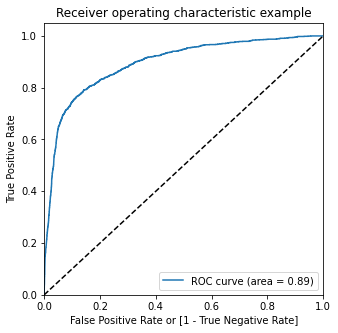

In [124]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### Finding Optimal Cutoff Point

In [125]:
# Optimal cutoff probability is that prob where we get balanced sensitivity and specificity
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.045315,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000012,0,1,0,0,0,0,0,0,0,0,0
2,1,0.410959,0,1,1,1,1,1,0,0,0,0,0
3,0,0.049695,0,1,0,0,0,0,0,0,0,0,0
4,0,0.003990,0,1,0,0,0,0,0,0,0,0,0


In [126]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.081488  1.000000  0.000000
0.1   0.1  0.810069  0.821404  0.809063
0.2   0.2  0.901240  0.717165  0.917571
0.3   0.3  0.928252  0.550382  0.961776
0.4   0.4  0.927969  0.307158  0.983046
0.5   0.5  0.927742  0.220292  0.990506
0.6   0.6  0.927629  0.171647  0.994698
0.7   0.7  0.923155  0.072272  0.998644
0.8   0.8  0.920550  0.027102  0.999815
0.9   0.9  0.919021  0.006949  0.999938


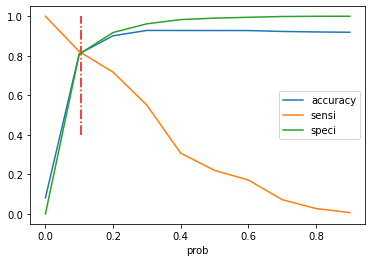

In [127]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.105, ymax=1, ymin=0.4, colors="r", linestyles="-.")
plt.show()

In [128]:
# From the curve above, 0.105 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.105 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.045315,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000012,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.410959,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.049695,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.003990,0,1,0,0,0,0,0,0,0,0,0,0


In [129]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8178266039979614

In [130]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
print(confusion)

[[13270  2950]
 [  267  1172]]


In [131]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8144544822793607

In [133]:
# Let us calculate specificity
TN / float(TN+FP)

0.8181257706535142

In [134]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.1818742293464858


In [135]:
# Positive predictive value 
print (TP / float(TP+FP))

0.28432799611838916


In [136]:
# Negative predictive value
print (TN / float(TN+ FN))

0.980276279825663


####  Precision and Recall

In [137]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion

array([[13270,  2950],
       [  267,  1172]], dtype=int64)

In [138]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.28432799611838916

In [139]:
print(recall_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted))

0.8144544822793607


#### Precision and recall tradeoff

In [140]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

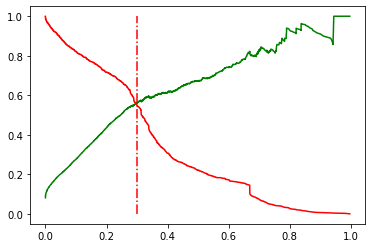

In [141]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.3, ymax=1, ymin=0.0, colors="r", linestyles="-.")
plt.show()

#### Optimal Cutoff Measures

In [142]:
# We will choose Optimal Cutoff to be 0.105 because we dont want to miss any customers who are going to Churn because 
# to acquire new customer the company needs to spend more money than to retain High value customers
# Creating new column 'final_predicted' with 1 if Churn_Prob > 0.105 else 0
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.105 else 0)
# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.045315,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000012,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.410959,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.049695,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.003990,0,1,0,0,0,0,0,0,0,0,0,0


In [143]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
print(confusion)

[[13270  2950]
 [  267  1172]]


In [144]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9277422277592162


In [145]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [146]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8144544822793607

In [147]:
# Let us calculate specificity
TN / float(TN+FP)

0.8181257706535142

In [148]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.1818742293464858


In [149]:
# positive predictive value 
print (TP / float(TP+FP))

0.28432799611838916


In [150]:
# Negative predictive value
print (TN / float(TN+ FN))

0.980276279825663


In [151]:
# Precision
TP/(TP+FP)

0.28432799611838916

In [152]:
# Recall
TP/(TP+FN)

0.8144544822793607

#### Making predictions on the test set

In [153]:
X_test = X_test[col]
X_test.head()

,std_og_t2m_mou_8,loc_ic_t2m_mou_7,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,date_of_last_rech_8,total_rech_data_8,av_rech_amt_data_8,sep_vbc_3g
46855,-0.068395,-0.523606,-0.828906,-0.500640,2.281259,0.456251,1.857942,0.267336,-0.180103
21366,-0.450832,-0.783359,-0.808738,-0.489903,2.078457,0.769976,3.094327,-0.241681,-0.180103
56672,-0.450832,-0.589010,-0.045267,-0.462316,-0.253763,0.769976,-0.202699,-0.496189,-0.180103
12881,-0.450832,-0.666774,-0.190520,-0.513195,-0.253763,-3.465323,0.209429,1.272318,-0.180103
6286,-0.450832,1.077836,1.287839,-0.291014,-0.253763,0.456251,-0.202699,0.293440,-0.180103


In [154]:
X_test_sm = sm.add_constant(X_test)

In [155]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

46855    0.010058
21366    0.007993
56672    0.021838
12881    0.028249
6286     0.000647
53993    0.000284
96995    0.720710
79098    0.053286
43393    0.000012
858      0.010445
dtype: float64

In [156]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [157]:
# Let's see the head
y_pred_1.head()

,0
46855,0.010058
21366,0.007993
56672,0.021838
12881,0.028249
6286,0.000647


In [158]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [159]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [160]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [161]:
y_pred_final.head()

,Churn,0
0,0,0.010058
1,0,0.007993
2,0,0.021838
3,0,0.028249
4,0,0.000647


In [162]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [163]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Churn,Churn_Prob
0,0,0.010058
1,0,0.007993
2,0,0.021838
3,0,0.028249
4,0,0.000647


In [164]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.105 else 0)
y_pred_final.head()

,Churn,Churn_Prob,final_predicted
0,0,0.010058,0
1,0,0.007993,0
2,0,0.021838,0
3,0,0.028249,0
4,0,0.000647,0


In [165]:
# Let's check the overall accuracy.
acc=metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)
acc

0.8147707755317743

#### Other Measures

In [166]:
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
print(confusion)

[[5706 1295]
 [ 107  461]]


In [167]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [168]:
# Let's see the sensitivity of our logistic regression model
sen=TP / float(TP+FN)
sen

0.8116197183098591

In [169]:
# Let us calculate specificity
spec=TN / float(TN+FP)
spec

0.8150264247964576

In [170]:
# Precision
prec=(TP/float(TP+FP))
prec

0.2625284738041002

In [171]:
# Recall
rec=(TP/float((TP+FN)))
rec

0.8116197183098591

In [172]:
# Percentage of Churn Customers as per Train data
len(y_train_pred_final[y_train_pred_final.predicted==1])/len(y_train_pred_final)*100

2.667195197916077

In [173]:
# Percentage of Churn Customers as per Test data
len(y_pred_final[y_pred_final.final_predicted==1])/len(y_pred_final)*100

23.199894305720704

#### Valuable Insights

1. The Accuracy is in good range of 81% for Test Data
2. Sensitivity is in good range of 81% for Test Data
3. Important features for Churn are:
---
* loc_ic_mou_8
* sep_vbc_3g
* av_rech_amt_data_8
* spl_ic_mou_8
* loc_ic_t2m_mou_7

### 5. Principal Component Analysis

In [174]:
pca = PCA(random_state=100)

In [175]:
pca.fit(X)

PCA(random_state=100)

In [176]:
pca.components_

array([[ 1.48394617e-01,  1.64783854e-01,  1.57569969e-01, ...,
        -9.69565943e-02, -9.62220222e-02, -7.51326940e-02],
       [-1.99364703e-02, -2.69164467e-02,  6.69299214e-03, ...,
         7.03211046e-02,  6.96697757e-02,  6.79776404e-02],
       [ 7.65412333e-02,  9.03105196e-02,  8.78396288e-02, ...,
        -3.39492716e-02, -4.66632415e-02, -3.89144011e-02],
       ...,
       [ 3.01938325e-16, -8.21607709e-17, -4.09242372e-17, ...,
        -4.83542038e-17, -7.44633783e-17,  6.62734115e-18],
       [-0.00000000e+00, -5.50011553e-17,  3.08286662e-16, ...,
        -3.35085779e-17, -6.48914220e-17, -1.98713817e-17],
       [ 0.00000000e+00, -4.49823941e-17, -1.33650803e-16, ...,
        -4.30514466e-18,  6.90164079e-17,  1.56257515e-16]])

In [177]:
pca.explained_variance_ratio_

array([1.25768216e-01, 9.46801255e-02, 5.27748176e-02, 4.80393176e-02,
       3.88896159e-02, 3.31015476e-02, 2.59321634e-02, 2.41880933e-02,
       2.28803731e-02, 2.01335261e-02, 1.99586859e-02, 1.95686124e-02,
       1.85209421e-02, 1.74802488e-02, 1.58553435e-02, 1.45191140e-02,
       1.44103132e-02, 1.42803419e-02, 1.35541366e-02, 1.30005193e-02,
       1.14116393e-02, 1.11022828e-02, 1.07398352e-02, 1.03459773e-02,
       9.86111354e-03, 8.95313433e-03, 8.82294915e-03, 8.44515155e-03,
       8.22821585e-03, 7.97983253e-03, 7.83649821e-03, 7.55694087e-03,
       7.14061137e-03, 7.05667277e-03, 6.90949292e-03, 6.82308277e-03,
       6.71452607e-03, 6.62204997e-03, 6.55819898e-03, 6.38679699e-03,
       6.01458058e-03, 5.97393441e-03, 5.79405911e-03, 5.65775737e-03,
       5.41064019e-03, 5.34088924e-03, 5.31846672e-03, 5.02328695e-03,
       4.92488280e-03, 4.75463580e-03, 4.59344340e-03, 4.51228887e-03,
       4.39388241e-03, 4.33108571e-03, 4.19606804e-03, 4.00154501e-03,
      

<BarContainer object of 137 artists>

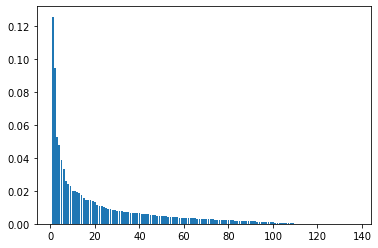

In [178]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [179]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

#### Scree Plot

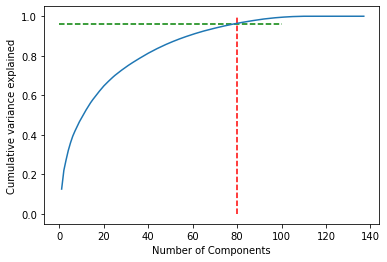

In [180]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.vlines(x=80, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.96, xmax=100, xmin=0, colors="g", linestyles="--")
plt.ylabel("Cumulative variance explained")
plt.xlabel("Number of Components")
plt.show()

We will select 80 components which will describe 96% variance in the data

In [181]:
# PCA with 80 components
pc2 = PCA(n_components=80, random_state=100)

In [182]:
newdata = pc2.fit_transform(X)

In [183]:
newdata.shape

(25228, 80)

In [184]:
# Making a dataframe out of it for convenience

In [185]:
df = pd.DataFrame(newdata,index=X.index)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
0,-4.832479,0.985490,3.528547,-2.989232,-0.824456,-0.074358,0.397691,-0.059197,0.230637,1.386204,-1.257626,0.291845,-0.759250,-0.278243,-1.858847,-1.128102,0.878708,-0.140725,-0.692547,0.705926,-0.410604,1.051082,-0.263819,-0.521965,0.164577,0.115343,-0.438641,-0.192348,0.665781,-0.123758,-0.328110,-0.193672,0.114304,0.733918,0.843642,0.118817,-0.497347,-0.011059,-0.120487,0.162387,0.522074,0.419260,-0.510450,0.923577,0.126825,-0.139234,-0.009919,-0.015645,-0.288338,-1.138948,-0.161598,0.513732,-0.294093,0.392677,-0.127591,0.021605,0.521570,0.990336,0.154403,0.416043,0.056245,0.327360,-0.165297,0.050292,0.098137,-0.109452,0.015394,-0.154834,0.072356,0.141685,0.164319,0.051379,0.224330,-1.228889,0.359076,-0.290160,0.232448,-0.226160,-0.229048,0.172522
8,-2.425277,-1.279207,-1.088478,-0.386189,-1.267051,0.525873,-0.258831,0.288301,-0.952279,0.568981,0.512096,1.036685,1.261672,0.017408,1.434228,0.873215,-1.297212,1.795606,-0.118261,0.576263,0.853598,-0.298605,0.083145,-0.145453,-0.510463,-0.513716,-0.230745,0.175148,0.135612,-1.551812,-0.319091,-0.004924,0.759183,-0.966727,0.656273,0.100633,0.301126,-0.244574,0.010968,0.053115,-0.687379,0.308684,-1.013192,-0.021041,-0.603649,0.038213,0.170377,-0.116360,0.196047,0.771390,0.964673,-0.552747,0.365540,-0.201439,0.014519,0.958661,0.175453,-0.363460,1.484673,0.337577,0.879282,0.142169,-0.113182,0.043920,-0.196471,-0.737709,0.143313,-0.168252,-0.385685,0.024683,-0.035351,0.445474,-0.899676,-0.242224,0.579702,-0.316511,-0.139109,0.310085,0.047424,0.264825
21,2.298159,-4.869692,-0.477578,0.944002,1.503733,-3.471192,-0.143798,-1.599926,-1.568028,0.577906,-0.661408,-0.439463,-0.576646,-0.109635,1.122233,1.972697,0.339188,0.060978,-0.131425,0.020844,-0.284273,0.092882,-0.519789,-0.833494,0.477263,-0.602397,-0.240144,0.319733,0.139907,0.114870,-0.069422,-0.031521,-0.230175,-0.352946,0.510760,-0.133516,0.025855,-0.557972,0.561542,-0.106299,-0.122014,0.415041,-0.701374,0.521748,-0.203517,-0.244178,0.167515,0.117248,-0.124573,-0.348258,0.588566,-0.052732,0.379709,0.047071,0.014643,0.326153,-0.379928,0.392169,0.065896,-0.089280,0.362356,0.306394,-0.443618,0.408591,-0.223843,-0.109507,0.019444,0.515266,0.118418,0.242342,-0.123453,-0.011775,0.150333,0.011558,0.120917,-0.062613,-0.459154,-0.023716,-0.284789,0.061861
23,-2.811791,1.793418,1.365321,-0.637541,-0.017051,0.164386,0.888494,-1.396004,-1.523626,2.576610,0.150016,-1.134146,0.991030,0.935810,-1.189917,-2.274202,-0.878560,-0.855834,0.009925,2.211778,0.197615,1.498119,-0.122518,0.485498,-0.582108,-1.196781,1.043619,2.556233,-0.370498,-1.823355,-0.586048,-0.494586,2.287689,1.963701,0.047817,0.406010,-0.463492,0.523553,-0.506177,-1.200143,1.305482,0.558367,-0.685499,2.501224,-2.211431,0.388313,-1.358795,0.845366,0.726682,-0.664099,-1.016727,-1.664057,-1.207158,-0.704010,0.715039,0.640374,-0.171505,0.554546,-0.323170,0.443557,-0.474681,0.682039,-0.289460,0.548561,0.268763,0.049976,-0.539918,-0.342550,-0.013101,0.491685,-0.392535,-0.426539,1.281921,0.008492,0.821839,-0.503889,0.255288,-0.125507,0.254622,0.609569
38,-1.007601,-4.211284,-0.019354,-1.189783,-0.796436,1.881078,0.661985,-0.699755,-0.076855,0.772306,-0.369317,-0.913114,0.082920,-0.812094,1.068899,0.832264,0.101517,0.180448,-0.217128,-0.256242,-0.288436,-0.228288,-0.454500,-0.707400,0.444332,0.071658,-0.694937,0.052075,0.454055,0.157783,-0.293093,0.074740,0.062921,0.352270,0.413147,-0.731695,-0.122202,-0.412474,0.166373,0.610407,-0.681656,0.685199,-0.358158,0.407010,0.066331,0.207499,-0.311760,-0.432926,-0.221390,-0.174783,-0.561648,0.706972,-0.612290,-0.009154,0.130577,0.172761,0.247722,0.272852,0.059490,-0.103710,0.299145,0.124727,0.113718,0.150137,-0.051478,-0.370646,-0.256633,0.207631,-0.122249,0.166138,-0.186226,0.328516,0.080704,-0.032786,0.237611,-0.06631

In [186]:
df_final = pd.concat([df, y], axis=1)

In [187]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,Churn
0,-4.832479,0.985490,3.528547,-2.989232,-0.824456,-0.074358,0.397691,-0.059197,0.230637,1.386204,-1.257626,0.291845,-0.759250,-0.278243,-1.858847,-1.128102,0.878708,-0.140725,-0.692547,0.705926,-0.410604,1.051082,-0.263819,-0.521965,0.164577,0.115343,-0.438641,-0.192348,0.665781,-0.123758,-0.328110,-0.193672,0.114304,0.733918,0.843642,0.118817,-0.497347,-0.011059,-0.120487,0.162387,0.522074,0.419260,-0.510450,0.923577,0.126825,-0.139234,-0.009919,-0.015645,-0.288338,-1.138948,-0.161598,0.513732,-0.294093,0.392677,-0.127591,0.021605,0.521570,0.990336,0.154403,0.416043,0.056245,0.327360,-0.165297,0.050292,0.098137,-0.109452,0.015394,-0.154834,0.072356,0.141685,0.164319,0.051379,0.224330,-1.228889,0.359076,-0.290160,0.232448,-0.226160,-0.229048,0.172522,1
8,-2.425277,-1.279207,-1.088478,-0.386189,-1.267051,0.525873,-0.258831,0.288301,-0.952279,0.568981,0.512096,1.036685,1.261672,0.017408,1.434228,0.873215,-1.297212,1.795606,-0.118261,0.576263,0.853598,-0.298605,0.083145,-0.145453,-0.510463,-0.513716,-0.230745,0.175148,0.135612,-1.551812,-0.319091,-0.004924,0.759183,-0.966727,0.656273,0.100633,0.301126,-0.244574,0.010968,0.053115,-0.687379,0.308684,-1.013192,-0.021041,-0.603649,0.038213,0.170377,-0.116360,0.196047,0.771390,0.964673,-0.552747,0.365540,-0.201439,0.014519,0.958661,0.175453,-0.363460,1.484673,0.337577,0.879282,0.142169,-0.113182,0.043920,-0.196471,-0.737709,0.143313,-0.168252,-0.385685,0.024683,-0.035351,0.445474,-0.899676,-0.242224,0.579702,-0.316511,-0.139109,0.310085,0.047424,0.264825,0
21,2.298159,-4.869692,-0.477578,0.944002,1.503733,-3.471192,-0.143798,-1.599926,-1.568028,0.577906,-0.661408,-0.439463,-0.576646,-0.109635,1.122233,1.972697,0.339188,0.060978,-0.131425,0.020844,-0.284273,0.092882,-0.519789,-0.833494,0.477263,-0.602397,-0.240144,0.319733,0.139907,0.114870,-0.069422,-0.031521,-0.230175,-0.352946,0.510760,-0.133516,0.025855,-0.557972,0.561542,-0.106299,-0.122014,0.415041,-0.701374,0.521748,-0.203517,-0.244178,0.167515,0.117248,-0.124573,-0.348258,0.588566,-0.052732,0.379709,0.047071,0.014643,0.326153,-0.379928,0.392169,0.065896,-0.089280,0.362356,0.306394,-0.443618,0.408591,-0.223843,-0.109507,0.019444,0.515266,0.118418,0.242342,-0.123453,-0.011775,0.150333,0.011558,0.120917,-0.062613,-0.459154,-0.023716,-0.284789,0.061861,0
23,-2.811791,1.793418,1.365321,-0.637541,-0.017051,0.164386,0.888494,-1.396004,-1.523626,2.576610,0.150016,-1.134146,0.991030,0.935810,-1.189917,-2.274202,-0.878560,-0.855834,0.009925,2.211778,0.197615,1.498119,-0.122518,0.485498,-0.582108,-1.196781,1.043619,2.556233,-0.370498,-1.823355,-0.586048,-0.494586,2.287689,1.963701,0.047817,0.406010,-0.463492,0.523553,-0.506177,-1.200143,1.305482,0.558367,-0.685499,2.501224,-2.211431,0.388313,-1.358795,0.845366,0.726682,-0.664099,-1.016727,-1.664057,-1.207158,-0.704010,0.715039,0.640374,-0.171505,0.554546,-0.323170,0.443557,-0.474681,0.682039,-0.289460,0.548561,0.268763,0.049976,-0.539918,-0.342550,-0.013101,0.491685,-0.392535,-0.426539,1.281921,0.008492,0.821839,-0.503889,0.255288,-0.125507,0.254622,0.609569,0
38,-1.007601,-4.211284,-0.019354,-1.189783,-0.796436,1.881078,0.661985,-0.699755,-0.076855,0.772306,-0.369317,-0.913114,0.082920,-0.812094,1.068899,0.832264,0.101517,0.180448,-0.217128,-0.256242,-0.288436,-0.228288,-0.454500,-0.707400,0.444332,0.071658,-0.694937,0.052075,0.454055,0.157783,-0.293093,0.074740,0.062921,0.352270,0.413147,-0.731695,-0.122202,-0.412474,0.166373,0.610407,-0.681656,0.685199,-0.358158,0.407010,0.066331,0.207499,-0.311760,-0.432926,-0.221390,-0.174783,-0.561648,0.706972,-0.612290,-0.009154,0.130577,0.172761,0.247722,0.272852,0.059490,-0.103710,0.299145,0.124727,0.113718,0.150137,-0.051478,-0.370646,-0.256633,0.207631,-0.122249,0.166138,-0.186226,0.328516,0.080704,-0.032786,0.2

In [188]:
df_final.shape

(25228, 81)

In [189]:
df_final.Churn.value_counts()

0    23221
1     2007
Name: Churn, dtype: int64

#### Splitting Train, Test for PCA Data

In [190]:
# Train, Test data
train, test = train_test_split(df_final, train_size=0.7, random_state=100)

In [191]:
# Creating X and Y
X_train = train.drop(['Churn'], axis=1)
X_test = test.drop(['Churn'], axis=1)
y_train=train['Churn']
y_test=test['Churn']

### 6. Random Forest

In [192]:
# Creating the random forest classifier model
rfc = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=5, random_state=100, oob_score=True,
                            class_weight ='balanced')

In [193]:
# Fitting the model with default parameters
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       oob_score=True, random_state=100)

In [194]:
# Out of Box Score
rfc.oob_score_

0.8615436887705986

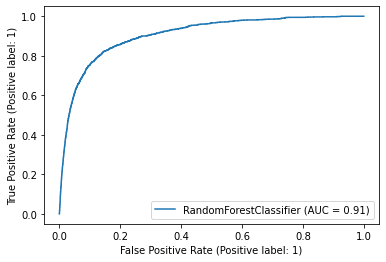

In [195]:
# Plotting ROC Curve
plot_roc_curve(rfc, X_train, y_train)
plt.show()

In [196]:
# Making predictions
predictions = rfc.predict(X_test)

In [197]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      7001
           1       0.34      0.76      0.47       568

    accuracy                           0.87      7569
   macro avg       0.66      0.82      0.70      7569
weighted avg       0.93      0.87      0.89      7569



In [198]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6156  845]
 [ 139  429]]


In [199]:
# Accuracy Score
print(accuracy_score(y_test,predictions))

0.8699960364645264


#### Parameter Tuning

In [200]:
# Creating Random Forest instance
rf = RandomForestClassifier(random_state=100, n_jobs=-1, class_weight='balanced')

In [201]:
# Hyper tuning
params = {
    'max_depth': [3,4,5],
    'n_estimators': [75,100,125],
    "max_features": [4,5,6]
}

In [202]:
# Parameter Model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [203]:
# Fitting the model
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'max_features': [4, 5, 6],
                         'n_estimators': [75, 100, 125]},
             scoring='recall', verbose=1)

In [204]:
# Best Score
grid_search.best_score_

0.7491411327762303

In [205]:
# Best Estimator
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=6,
                       n_jobs=-1, random_state=100)

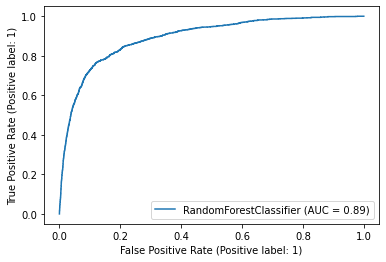

In [206]:
# ROC Curve for Best Model
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [207]:
# Best Model Importance
rf_best.feature_importances_

array([0.06707691, 0.12494961, 0.02616811, 0.13271133, 0.01019096,
       0.00161469, 0.11931574, 0.05693607, 0.02300669, 0.00562784,
       0.00705375, 0.00169083, 0.00285501, 0.0168037 , 0.00202572,
       0.03011715, 0.0257308 , 0.06278904, 0.00941519, 0.02642859,
       0.00337244, 0.00710304, 0.00103446, 0.00129606, 0.01203863,
       0.00987771, 0.00253992, 0.00046179, 0.00150696, 0.03843948,
       0.00066361, 0.00661979, 0.00553   , 0.01025341, 0.02043575,
       0.00104096, 0.00746701, 0.00058826, 0.00030131, 0.0019645 ,
       0.00379831, 0.00123671, 0.01167293, 0.00398741, 0.00194512,
       0.        , 0.00178816, 0.00253241, 0.00103644, 0.02289873,
       0.01027491, 0.0065102 , 0.00220899, 0.00122083, 0.00035312,
       0.00227355, 0.0019348 , 0.00115114, 0.0023404 , 0.00026962,
       0.00168621, 0.01152787, 0.00033893, 0.00575841, 0.00188922,
       0.00182489, 0.00268384, 0.00026801, 0.00083958, 0.00020579,
       0.00099777, 0.00019153, 0.00084413, 0.00072054, 0.00166

In [208]:
# Importance variable into Data Frame
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [209]:
# Printing the importance PCA features
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
3,3,0.132711
1,1,0.124950
6,6,0.119316
0,0,0.067077
17,17,0.062789
7,7,0.056936
29,29,0.038439
15,15,0.030117
19,19,0.026429
2,2,0.026168


In [210]:
# Making predictions
predictions = rf_best.predict(X_test)

In [211]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7001
           1       0.31      0.77      0.44       568

    accuracy                           0.85      7569
   macro avg       0.64      0.81      0.68      7569
weighted avg       0.93      0.85      0.88      7569



In [212]:
y_test.shape

(7569,)

In [213]:
predictions.shape

(7569,)

In [214]:
df_random_test = pd.DataFrame(data = {'Y_test_actual':y_test,'prediction_random': predictions})

In [215]:
check10 = df_random_test["Y_test_actual"] == 1

In [216]:
df_random_test.loc[check10,:]["prediction_random"].value_counts()

1    435
0    133
Name: prediction_random, dtype: int64

In [217]:
# Printing confusion matrix
confusion_random=confusion_matrix(y_test,predictions)
print(confusion_random)

[[6018  983]
 [ 133  435]]


In [218]:
# Accuracy of Test
acc_rf=accuracy_score(y_test,predictions)
acc_rf

0.8525564803804994

#### Other Measures

In [219]:
TP_random = confusion_random[1,1] # true positive 
TN_random = confusion_random[0,0] # true negatives
FP_random = confusion_random[0,1] # false positives
FN_random = confusion_random[1,0] # false negatives

In [220]:
# Let's see the sensitivity
sen_rf=TP_random / float(TP_random+FN_random)
sen_rf

0.7658450704225352

In [221]:
# Let us calculate specificity
spec_rf=TN_random / float(TN_random+FP_random)
spec_rf

0.8595914869304385

In [222]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP_random/ float(TN_random+FP_random))

0.14040851306956148


In [223]:
# positive predictive value 
print (TP_random / float(TP_random+FP_random))

0.3067700987306065


In [224]:
# Negative predictive value
print (TN_random / float(TN_random+ FN_random))

0.978377499593562


In [225]:
# Precision
prec_rf=TP_random/float(TP_random+FP_random)
prec_rf

0.3067700987306065

In [226]:
# Recall
rec_rf=TP_random/float((TP_random+FN_random))
rec_rf

0.7658450704225352

### 7. XGBoost

In [227]:
# Creating the XGBoost classifier model
xgclf = xgb.XGBClassifier(scale_pos_weight=12,random_state=100)

In [228]:
# Fitting the model
xgclf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, ...)

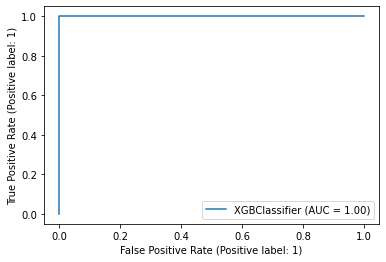

In [229]:
# Plotting ROC Curve
plot_roc_curve(xgclf, X_train, y_train)
plt.show()

In [230]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7001
           1       0.31      0.77      0.44       568

    accuracy                           0.85      7569
   macro avg       0.64      0.81      0.68      7569
weighted avg       0.93      0.85      0.88      7569



In [231]:
# Making predictions
predictions = xgclf.predict(X_test)

In [232]:
# Checking AUC Scores
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=xgclf.predict_proba(X_train)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xgclf.predict_proba(X_test)[:, 1]))

AUC on train data by XGBoost = 0.9999999999999999
AUC on test data by XGBoost = 0.8924204238428716


In [233]:
# Printing confusion matrix - Train
print(confusion_matrix(y_train,xgclf.predict(X_train)))

[[16216     4]
 [    0  1439]]


In [234]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6735  266]
 [ 293  275]]


In [235]:
# Accuracy - Train
print(accuracy_score(y_train,xgclf.predict(X_train)))

0.9997734866073956


In [236]:
# Accuracy - Test
print(accuracy_score(y_test,predictions))

0.9261461223411283


In [237]:
#Default-Run of default-hyperparameters

xgb_model = xgb.XGBClassifier(scale_pos_weight=12,random_state=100)

parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100], }

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring= "recall",
                                       refit=True)

In [238]:
# Fitting the model
# %%time
clf_xgb.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=100, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3], 'max_depth': [6],
                         'min_child_weight': [1], 'n_estimators': [100]},
             scoring='recall')

In [239]:
# Print the scores
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.4475208768267223
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, ...)


#### Parameter Tuning

In [240]:
# Parameter Tuning
xgb_model = xgb.XGBClassifier(max_depth=2,n_estimators=200,scale_pos_weight=12,random_state=100)

In [241]:
# Parameter Tuning - selecting few because of CPU / RAM limitations
params = {'learning_rate': [0.2, 0.6], 
          'subsample': [0.3, 0.6, 0.9],
          'max_features':[6]
         }

In [242]:
# Grid Search CV
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="recall")

In [243]:
# Fitting hyperparameter model
# %%time
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[10:36:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=100, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.6], 'max_features': [6],
                         'subsample': [0.3, 0.6, 0.9]},
             scoring='recall', verbose=1)

In [244]:
# Best Score
grid_search.best_score_

0.7616591278125725

In [245]:
# Best model 
xg_best = grid_search.best_estimator_

In [246]:
# Fitting the best model and AUC Scores
xg_best.fit(X_train, y_train)
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=xg_best.predict_proba(X_train)[:, 1]))
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xg_best.predict_proba(X_test)[:, 1]))

[10:36:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


AUC on train data by XGBoost = 0.9586911079330506
AUC on test data by XGBoost = 0.8993116677496776


In [247]:
# Making predictions
predictions_xgboost=xg_best.predict(X_test)

#### Other Measures

In [248]:
# Printing confusion matrix
confusion_xgboost=confusion_matrix(y_test,predictions_xgboost)
print(confusion_xgboost)

[[6065  936]
 [ 118  450]]


In [249]:
# Accuracy Score
acc_xgb=accuracy_score(y_test,predictions_xgboost)
acc_xgb

0.8607477870260272

In [250]:
TP_xgboost = confusion_xgboost[1,1] # true positive 
TN_xgboost = confusion_xgboost[0,0] # true negatives
FP_xgboost = confusion_xgboost[0,1] # false positives
FN_xgboost = confusion_xgboost[1,0] # false negatives

In [251]:
# Let's see the sensitivity
sen_xgb=TP_xgboost / float(TP_xgboost+FN_xgboost)
sen_xgb

0.7922535211267606

In [252]:
# Let us calculate specificity
spec_xgb=TN_xgboost / float(TN_xgboost+FP_xgboost)
spec_xgb

0.8663048135980574

In [253]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP_xgboost/ float(TN_xgboost+FP_xgboost))

0.13369518640194258


In [254]:
# positive predictive value 
print (TP_xgboost / float(TP_xgboost+FP_xgboost))

0.3246753246753247


In [255]:
# Negative predictive value
print (TN_xgboost / float(TN_xgboost+ FN_xgboost))

0.9809154132298237


In [256]:
# Precision
prec_xgb=(TP_xgboost/float(TP_xgboost+FP_xgboost))
prec_xgb

0.3246753246753247

In [257]:
# Recall
rec_xgb=(TP_xgboost/float((TP_xgboost+FN_xgboost)))
rec_xgb

0.7922535211267606

### 8. Model Comparison

In [258]:
print('Logistic Regression with RFE \n\n Confusion Matrix')
print(confusion)
print('\nAccuracy =',acc)
print('Sensitivity = ',sen)
print('Specificity = ',spec)
print('Precision = ',prec)
print('Recall = ',rec)
print('-'*50)
print('Random Forest with PCA \n\n Confusion Matrix')
print(confusion_random)
print('\nAccuracy =',acc_rf)
print('Sensitivity = ',sen_rf)
print('Specificity = ',spec_rf)
print('Precision = ',prec_rf)
print('Recall = ',rec_rf)
print('-'*50)
print('XGBoost with PCA \n\n Confusion Matrix')
print(confusion_xgboost)
print('\nAccuracy =',acc_xgb)
print('Sensitivity = ',sen_xgb)
print('Specificity = ',spec_xgb)
print('Precision = ',prec_xgb)
print('Recall = ',rec_xgb)

Logistic Regression with RFE 

 Confusion Matrix
[[5706 1295]
 [ 107  461]]

Accuracy = 0.8147707755317743
Sensitivity =  0.8116197183098591
Specificity =  0.8150264247964576
Precision =  0.2625284738041002
Recall =  0.8116197183098591
--------------------------------------------------
Random Forest with PCA 

 Confusion Matrix
[[6018  983]
 [ 133  435]]

Accuracy = 0.8525564803804994
Sensitivity =  0.7658450704225352
Specificity =  0.8595914869304385
Precision =  0.3067700987306065
Recall =  0.7658450704225352
--------------------------------------------------
XGBoost with PCA 

 Confusion Matrix
[[6065  936]
 [ 118  450]]

Accuracy = 0.8607477870260272
Sensitivity =  0.7922535211267606
Specificity =  0.8663048135980574
Precision =  0.3246753246753247
Recall =  0.7922535211267606


In [259]:
result=pd.DataFrame({
    'Model':['Logistic Regression with RFE','Random Forest with PCA','XGBoost with PCA'],
    'Confusion Matrix':[confusion,confusion_random,confusion_xgboost],
    'Accuracy':[acc,acc_rf,acc_xgb],
    'Sensitivity':[sen,sen_rf,sen_xgb],
    'Specificity':[spec,spec_rf,spec_xgb],
    'Precision':[prec,prec_rf,prec_xgb]
})
result

,Model,Confusion Matrix,Accuracy,Sensitivity,Specificity,Precision
0,Logistic Regression with RFE,"[[5706, 1295], [107, 461]]",0.814771,0.811620,0.815026,0.262528
1,Random Forest with PCA,"[[6018, 983], [133, 435]]",0.852556,0.765845,0.859591,0.306770
2,XGBoost with PCA,"[[6065, 936], [118, 450]]",0.860748,0.792254,0.866305,0.324675


### 9. Metrics for evaluation of the models:
1. Since the primary objective of the business is to  prevent the churn,we should chose a model which identifies the churn customers better.
2. As the data set is highly imbalanced (92% Non churn & 8% churn), accuracy will be a poor measure to assess performance of the model
3. Instead **Recall/Sensitivity** will be a very good measure. A model with 81% sensitivity will identify 81% of churned customers and will only miss 19% of churned customers. A highly sensitive model can be useful for rolling out targeted plans & Schemes to potential churn customers & retain them

From the above  results table, it looks like the Logistic Regression with RFE gives better model performance when comparing Random Forest with PCA and XGBoost with PCA for the following reasons:
1. Sensitivity is best among all models (81%)
2. Accuracy is around 81% which is in an acceptable range
3. Model interpretation is much better using Logistic Regression

### 10. Churn Indicators & Business Recommendations:

Below are the top 5 **important indicators** to determine Churn using Logistic Regression
1. Local Incoming Minutes for 8th Month: If a user Local Incoming Minutes is dropping during the action phase(8th Month in this    case), customer is likely to churn
2. Volume based cost for 3G - When customer is not purchasing any data plan for 3G & just paying as per use, he/she is likely to    churn
3. Average Recharge Amount for Data for 8th Month - If the average recharge amounts decrease in the action phase, he/she is        likely to churn
4. Special Incoming Calls for 8th Month - If a user Special Incoming Minutes is dropping during the action phase(8th Month in      this case), customer is likely to churn
5. Local Incoming Minutes for 7th Month - If a user local Incoming Minutes is dropping during the end of good phase(7th Month in    this case), customer is likely to churn


**Recommendations**
1. For the customers who might churn in future as per the model prediction,using customer service we should first understand issues they are facing. This will also help us in preventing rolling out unnecessary promotional plans if customer is happy( Remember that accuracy of model is around 81%),
2. Once we understand the issues faced by customer, we can take redressal steps like rolling out attractive plans, cashback offers, loyalty programs, freebies to retain them instead of letting them go.
3. If many customers in same area are facing network issues, we may even consider installation of additional towers near by provided that its profitable for the company.